In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [2]:
#used code from https://github.com/jaymody/backpropagation

In [3]:
# getting the data
data=pd.read_csv(r"C:\Users\Almog\Downloads\wpbc.data")

In [4]:
# showing the first 10 (0-9) rows.
data.head(10)

,119513,N,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,...,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5.1
0,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
1,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.1188,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
2,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
3,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
4,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,...,107.30,733.2,0.1706,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0
5,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.12370,0.12130,...,152.60,1593.0,0.1144,0.3371,0.2990,0.19220,0.2726,0.09581,1.5,?
6,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,4.0,10
7,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,2.0,1
8,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,6.0,20
9,845636,N,123,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,...,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,2.0,0


In [5]:
#cheching the shape of the dataset
data.shape

(197, 35)

In [6]:
# checking the empty spots. 
data.isna().sum()

119513      0
N           0
31          0
18.02       0
27.6        0
117.5       0
1013        0
0.09489     0
0.1036      0
0.1086      0
0.07055     0
0.1865      0
0.06333     0
0.6249      0
1.89        0
3.972       0
71.55       0
0.004433    0
0.01421     0
0.03233     0
0.009854    0
0.01694     0
0.003495    0
21.63       0
37.08       0
139.7       0
1436        0
0.1195      0
0.1926      0
0.314       0
0.117       0
0.2677      0
0.08113     0
5           0
5.1         0
dtype: int64

In [7]:
class MLP:
    ##### Constructor ####
    def __init__(self, n_input_nodes, hidden_nodes, n_output_nodes, lr):
        ## Network ##
        self.n_input_nodes = n_input_nodes
        self.n_output_nodes = n_output_nodes
        
        self.nodes = hidden_nodes
        self.nodes.insert(0, n_input_nodes)
        self.nodes.append(n_output_nodes)
        
        ## Weights and Biases##
        self.weights = []
        self.biases = []
        for i in range(1, len(self.nodes)):
            self.weights.append(np.random.uniform(-1.0, 1.0, (self.nodes[i-1], self.nodes[i])))
            self.biases.append(np.random.uniform(-1.0, 1.0, (1, self.nodes[i])))
        
        ## Learning Rate ##
        self.lr = lr
        
        ## Activation Functions ##
        # Linear Activation
        self.linear = lambda x: x
        self.d_linear = lambda x: np.ones(x.shape)
        
        # Relu Activation
        def relu(x):
            x[x<0] = 0
            return x
        def d_relu(out):
            out: x[x>0] = 1
            return out
        self.relu = relu
        self.d_relu = d_relu
            
        # Sigmoid Activation
        self.sigmoid = lambda x: 1 / (1 + np.exp(-x))
        self.d_sigmoid = lambda out: out * (1 - out)  # assumes out is tanh(x)
        
        # Hyperbolic Tangent Activation
        self.tanh = lambda x: np.tanh(x)
        self.d_tanh = lambda out: 1 - out**2 # assumes out is tanh(x)
        
    def getWeights(self):
        return self.weights.copy()
    def getBiases(self):
        return self.biases.copy()
    
    def setWeights(self, weights):
        self.weights = weights.copy()
    def setBiases(self, biases):
        self.biases = biases.copy()
    
    #### Feed Forward ####
    def feed_forward(self, X):
        outputs = [X]
        
        logits = np.dot(X, self.weights[0]) + self.biases[0]
        
        for i in range(1, len(self.nodes) - 1):
            out = self.sigmoid(logits)
            outputs.append(out)
            logits = np.dot(out, self.weights[i]) + self.biases[i]
        
        out = self.sigmoid(logits)
        outputs.append(out)
        
        return outputs
    
    #### Backpropagation ####
    def backpropagation(self, X, y, outputs):
        weights_gradients = []
        biases_gradients = []
        
        d1 = y - outputs[-1]
        d2 = self.d_sigmoid(outputs[-1])
        error = d1 * d2
        
        grad = outputs[-2].T * error 
        weights_gradients.append(grad)
        biases_gradients.append(error)
        
        for i in range(len(self.weights) - 2, 1, -1):
            d = self.d_sigmoid(outputs[i])
            error = np.dot(error, self.weights[i+1].T) * d
            
            grad = outputs[i-1].T * error 
            weights_gradients.append(grad)
            biases_gradients.append(error)
        
        return weights_gradients, biases_gradients
    
    #### Training ####
    def train(self, features, targets):
        # Batch Size for weight update step
        batch_size = features.shape[0]
        
        # Delta Weights Variables
        delta_weights = [np.zeros(weight.shape) for weight in self.weights]
        delta_biases = [np.zeros(bias.shape) for bias in self.biases]
        
        # For every data point, forward pass, backpropogation, store weights change
        for X, y in zip(features, targets):
            # Forward pass
            X = X.reshape(1, X.shape[0])
            outputs = self.feed_forward(X)
            
            # Back propogation
            weights_gradients, biases_gradients = self.backpropagation(X, y, outputs)
            
            for i in range(len(weights_gradients)):
                delta_weights[-(i+1)] += weights_gradients[i]
                delta_biases[-(i+1)] += biases_gradients[i]
        
        for i in range(len(delta_weights)):
            self.weights[i] += (self.lr * delta_weights[i]) / batch_size
            self.biases[i] += (self.lr * delta_biases[i]) / batch_size

    #### Testing Methods ####
    def predict(self, X):
        # Gives prediction
        return self.feed_forward(X)[-1]
    
    def test(self, features, targets):
        predictions = self.predict(features)

        n_correct = 0
        for i in range(len(predictions)):
            prediction = np.argmax(predictions[i])
            correct = np.argmax(targets[i])

            if prediction == correct:
                n_correct += 1

        return n_correct / len(targets)

In [8]:
colors_list = ['red', 'cyan', 'magenta', 'green', 'black', 'blue']
colors = ListedColormap(colors_list)

def MSE(y, y_hat):
    return np.mean((y-y_hat)**2)

def generate_area_map(features, points_per_int = 10, alpha = 0.2):
    ###  Area Map Set  ###
    xstart = int((features[:, 0].min() - 1) * points_per_int) # min start point of the x data
    xrang = int((features[:, 0].max() + 1) * points_per_int - xstart) # range of the data on x

    ystart = int((features[:, 1].min()  - 1) * points_per_int) # min start poing of the y data
    yrang = int((features[:, 1].max() + 1) * points_per_int - ystart) # range of teh data on y

    # Creates an array with all the coordinates of area map set
    area_map_set = np.array([[x + xstart, y + ystart] for x in range(xrang) for y in range(yrang)])
    area_map_set = area_map_set / points_per_int
    
    return area_map_set

def area_map_plot(network, area_map_set, features, targets, path = '', alpha = 0.1):
    # gets the prediction the model made for the area map set
    pred = network.predict(area_map_set)
    pred = [pred[i,:].argmax() for i in range(int(pred.shape[0]))]

    # draws the current area map and the test set overtop it, saves the scatter
    plt.scatter(features[:, 0], features[:, 1], c = targets, cmap =colors)
    plt.scatter(area_map_set[:, 0], area_map_set[:, 1], c = pred, alpha = alpha, cmap = colors)
    
    if path == '':
        plt.show()
    else:
        plt.savefig(path)
        plt.close()

In [9]:
# round 4 numbers after dot
data = data.round(4)
data.head(10)

,119513,N,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,...,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5.1
0,8423,N,61,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,3.0,2
1,842517,N,116,21.37,17.44,137.50,1373.0,0.0884,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.0907,2.5,0
2,843483,N,123,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730,2.0,0
3,843584,R,27,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768,3.5,0
4,843786,R,77,12.75,15.29,84.60,502.7,0.1189,0.1569,0.1664,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.1179,2.5,0
5,844359,N,60,18.98,19.61,124.40,1112.0,0.0909,0.1237,0.1213,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.0958,1.5,?
6,844582,R,77,13.71,20.83,90.20,577.9,0.1189,0.1645,0.0937,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,4.0,10
7,844981,N,119,13.00,21.82,87.50,519.8,0.1273,0.1932,0.1859,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.1072,2.0,1
8,845010,N,76,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.2075,6.0,20
9,845636,N,123,16.02,23.24,102.70,797.8,0.0821,0.0667,0.0330,...,123.80,1150.0,0.1181,0.1551,0.1459,0.0998,0.2948,0.0845,2.0,0


In [10]:
# change the column 1 from N to 0 and R to 1
#Create array and enter it string values 'how_much' times
#Convert the array to dataframe, then concat between both datasets and drop and non-numerical column.
how_much = data.iloc[: , 1].values
temporary = []
for num in how_much:
    if num == "R":
        temporary.append(1)
    else:
        temporary.append(0)
data = data.drop(data.columns[1], axis=1)
wine = pd.DataFrame(data=temporary, columns=['N'])
data = pd.concat([data ,wine], axis=1)

# Delete the lines with "?" in their features
# print(df[df.iloc[:,-1] == "?"])
data = data.drop(data.index[5])
data = data.drop(data.index[26])
data = data.drop(data.index[82])
data = data.drop(data.index[192])


data.head(10)

,119513,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,0.07055,...,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5.1,N
0,8423,61,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.1471,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,3.0,2,0
1,842517,116,21.37,17.44,137.50,1373.0,0.0884,0.1189,0.1255,0.0818,...,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.0907,2.5,0,0
2,843483,123,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730,2.0,0,0
3,843584,27,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768,3.5,0,1
4,843786,77,12.75,15.29,84.60,502.7,0.1189,0.1569,0.1664,0.0767,...,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.1179,2.5,0,1
6,844582,77,13.71,20.83,90.20,577.9,0.1189,0.1645,0.0937,0.0598,...,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,4.0,10,1
7,844981,119,13.00,21.82,87.50,519.8,0.1273,0.1932,0.1859,0.0935,...,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.1072,2.0,1,0
8,845010,76,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.0854,...,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.2075,6.0,20,0
9,845636,123,16.02,23.24,102.70,797.8,0.0821,0.0667,0.0330,0.0332,...,1150.0,0.1181,0.1551,0.1459,0.0998,0.2948,0.0845,2.0,0,0
10,846100,125,15.78,17.89,103.60,781.0,0.0971,0.1292,0.0995,0.0661,...,1299.0,0.1396,0.5609,0.3965,0.1810,0.3792,0.1048,1.4,0,0


In [11]:
# setting up y label.
y = data[['N']]
y.head()

,N
0,0
1,0
2,0
3,1
4,1


In [12]:
# setting up x label, aka the features.
X = data.drop(['N'],axis=1)
X.head()

,119513,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,0.07055,...,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5.1
0,8423,61,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.1471,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,3.0,2
1,842517,116,21.37,17.44,137.50,1373.0,0.0884,0.1189,0.1255,0.0818,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.0907,2.5,0
2,843483,123,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730,2.0,0
3,843584,27,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768,3.5,0
4,843786,77,12.75,15.29,84.60,502.7,0.1189,0.1569,0.1664,0.0767,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.1179,2.5,0


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X ,y ,random_state=1)

TypeError: '(slice(None, None, None), 0)' is an invalid key

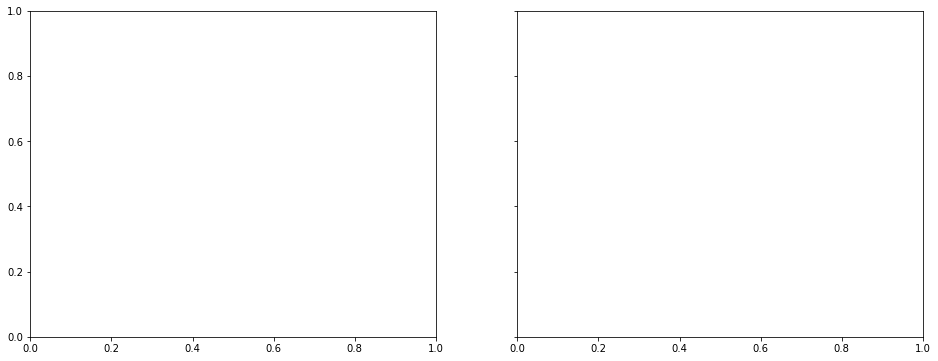

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, sharex = True, figsize=(16, 6))

_ = ax1.scatter(x_train[:, 0], x_train[:, 1], c = y_train, cmap = colors)
_ = ax1.set_title('training set')

_ = ax2.scatter(x_test[:, 0], x_test[:, 1], c = y_test, cmap = colors)
_ = ax2.set_title('testing set')

In [ ]:
n_input_nodes = 34
n_output_nodes = 3
n_hidden_nodes = [64, 32]
lr = 0.01

## Neural Network ##
network = MLP(n_input_nodes, n_hidden_nodes, n_output_nodes, lr)

In [ ]:
area_map_set = generate_area_map(x_test, points_per_int = 7)
area_map_plot(network, area_map_set, x_test, y_test, alpha = 0.15)
    
print("Accuracy on Train Set:", network.test(x_train, y_train))
print("Accuracy on Test Set:", network.test(x_test, y_test))